In [1]:
%matplotlib inline


In [2]:
## SENSOR EXTERIOR FUNCIONO DEL 19 AL 28 DE OCTUBRE
## SENSOR INTERIOR FUNCIONO DEL 25 DE OCTUBRE AL 3 DE NOVIEMBRE

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [9, 6]

In [4]:
# Obtener el json (solo los datos del sensor 4)
sensor_df = pd.read_json('test-arduino-26-nov.json')

sensordf2 = sensor_df.drop(columns=['nameSensors', 'sensor1', 'sensor2', 'sensor3', 'sensor4'])
sensordf2.dropna(subset = ["sensor5"], inplace=True)

In [5]:
sensordf2

,sensor5
2020-10-19T15:58:25Z,"{'humidity': 11, 'light': 1020.8, 'temperature..."
2020-10-19T17:36:13Z,"{'humidity': 12, 'light': 544, 'temperature': ..."
2020-10-19T17:37:44Z,"{'humidity': 12, 'light': 1016.8, 'temperature..."
2020-10-19T17:37:56Z,"{'humidity': 12, 'light': 89.1, 'temperature':..."
2020-10-19T19:02:34Z,"{'humidity': 16, 'light': 95.2, 'temperature':..."
...,...
2020-11-21T03:20:31Z,"{'humidity': 71, 'light': 37, 'temperature': 1..."
2020-11-21T03:20:35Z,"{'humidity': 71, 'light': 37, 'temperature': 1..."
2020-11-21T03:20:44Z,"{'humidity': 71, 'light': 37, 'temperature': 1..."
2020-11-21T03:20:54Z,"{'humidity': 71, 'light': 37, 'temperature': 1..."


In [6]:
data = sensordf2['sensor5'].values.tolist()
df = pd.DataFrame(data,columns =['humidity', 'light','temperature', 'timestamp'])

In [7]:
df['date'] = pd.to_datetime(df['timestamp'],unit='s', errors='coerce')
df

,humidity,light,temperature,timestamp,date
0,11.0,1020.8,35.20508,1603123105,2020-10-19 15:58:25
1,12.0,544.0,19.61914,1603128973,2020-10-19 17:36:13
2,12.0,1016.8,20.10742,1603129064,2020-10-19 17:37:44
3,12.0,89.1,14.78516,1603129076,2020-10-19 17:37:56
4,16.0,95.2,15.27344,1603134154,2020-10-19 19:02:34
...,...,...,...,...,...
76521,71.0,37.0,18.90000,1605928831,2020-11-21 03:20:31
76522,71.0,37.0,19.00000,1605928835,2020-11-21 03:20:35
76523,71.0,37.0,19.30000,1605928844,2020-11-21 03:20:44
76524,71.0,37.0,19.00000,1605928854,2020-11-21 03:20:54


In [8]:
df2 = df[df['date'] > '2020-10-25 22:25:00']
df2 = df2[df2['date'] < '2020-11-03 00:00:00']
df2 = df2[df2['temperature'] < 100]

In [9]:
df2

,humidity,light,temperature,timestamp,date
166,55.0,64.0,23.6,1603666082,2020-10-25 22:48:02
167,54.0,65.0,23.6,1603666172,2020-10-25 22:49:32
168,54.0,62.0,23.6,1603666355,2020-10-25 22:52:35
169,54.0,61.0,23.6,1603666445,2020-10-25 22:54:05
170,54.0,60.0,23.6,1603666547,2020-10-25 22:55:47
...,...,...,...,...,...
71698,53.0,34.0,24.6,1604361558,2020-11-02 23:59:18
71699,53.0,34.0,24.6,1604361568,2020-11-02 23:59:28
71700,53.0,35.0,24.6,1604361578,2020-11-02 23:59:38
71701,53.0,34.0,24.6,1604361588,2020-11-02 23:59:48


In [10]:
df2['humidity'].max()

62.0

In [11]:
plt.rcParams["figure.figsize"] = (10,5)

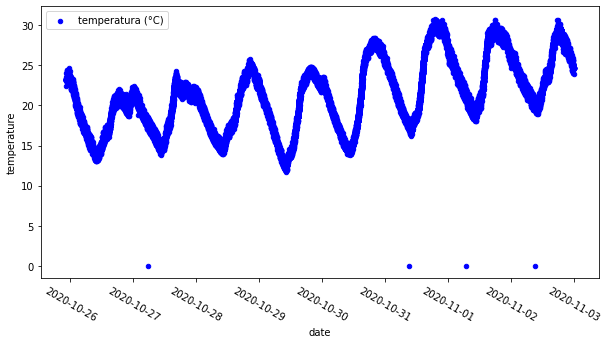

In [12]:
#Temperatura
ax1 = df2.plot(kind='scatter', x='date', y='temperature', color='b', label="temperatura (°C)") 

ax1.legend()

plt.xticks(rotation=-30)
plt.savefig("temperatura_interior.pdf")
plt.show()

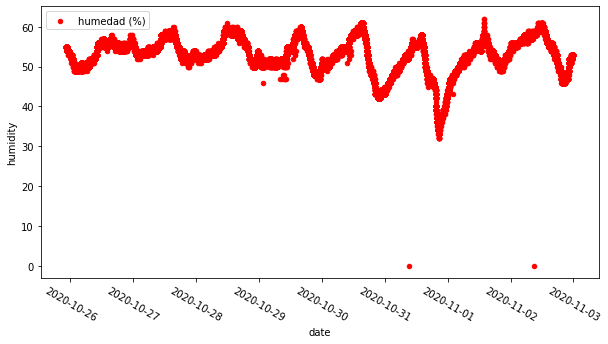

In [13]:
# Humedad
ax1 = df2.plot(kind='scatter', x='date', y='humidity', color='r', label="humedad (%)") 

ax1.legend()

plt.xticks(rotation=-30)
plt.savefig("humedad_interior.pdf")
plt.show()

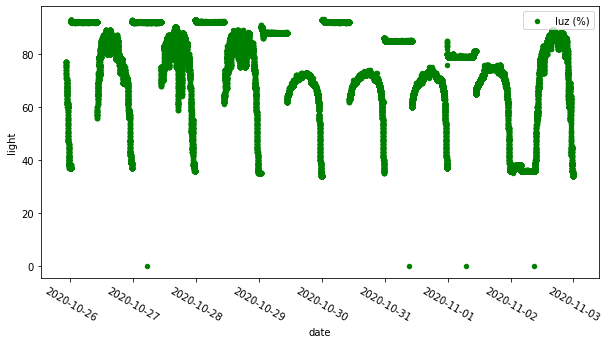

In [14]:
# Luz
ax1 = df2.plot(kind='scatter', x='date', y='light', color='g',  label="luz (%)") 

ax1.legend()

plt.xticks(rotation=-30)
plt.savefig("luz_interior.pdf")
plt.show()

In [15]:
#Temperatura
media = df2["temperature"].mean()
mediana = df2["temperature"].median()
moda = df2["temperature"].mode()
print(media,mediana,moda)

21.245408851113716 21.1 0    21.4
dtype: float64


In [16]:
#Humedad
media = df2["humidity"].mean()
mediana = df2["humidity"].median()
moda = df2["humidity"].mode()
print(media,mediana,moda)

52.95841398322482 53.0 0    55.0
dtype: float64


In [17]:
#Luz
media = df2["light"].mean()
mediana = df2["light"].median()
moda = df2["light"].mode()
print(media,mediana,moda)

76.61641237596915 79.0 0    92.0
dtype: float64
